In [13]:
import boto3
import json
from boto3 import client
from boto3.session import Session
import urllib2
from IPython.display import Image

In [2]:
#aws access and secret key
AWS_ACCESS_KEY_ID='AWS_ACCESS_KEY_ID'
AWS_SECRET_ACCESS_KEY='AWS_SECRET_ACCESS_KEY'

In [6]:
REGION = 'REGION-NAME'
QUEUE_NAME='QUEUE_NAME'

In [7]:
#function to create sqs queue using boto 3
def create_sqs_queue():
    sqs = boto3.client("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    sqs_queue = sqs.create_queue(QueueName=QUEUE_NAME)       
    print(sqs_queue)

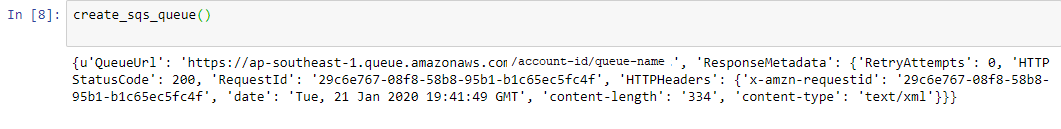

In [79]:
Image(filename='create_queue.png')

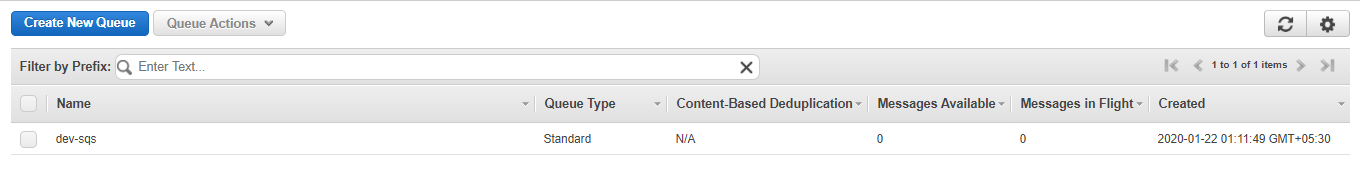

In [9]:
#AWS Console-View of created sqs queue
Image(filename='sqs_queue_create.png')

In [57]:
#function to get sqs queue url using boto 3
def get_queue_url():
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    queue_name=sqs.get_queue_by_name(QueueName=QUEUE_NAME)
    queue_url=str(queue_name)
    #to strip the 'sqs.Queue(url='https://region-name/account-id/queue-name')' result returned from queue_url
    queue_url=queue_url.partition("url='")[2].strip("')")
    return queue_url

In [58]:
queue_url=get_queue_url()

In [12]:
#function to list sqs queue url using boto 3
def list_queue_url():
    sqs = boto3.client("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    list_queues=sqs.list_queues(QueueName=QUEUE_NAME)
    print(list_queues)

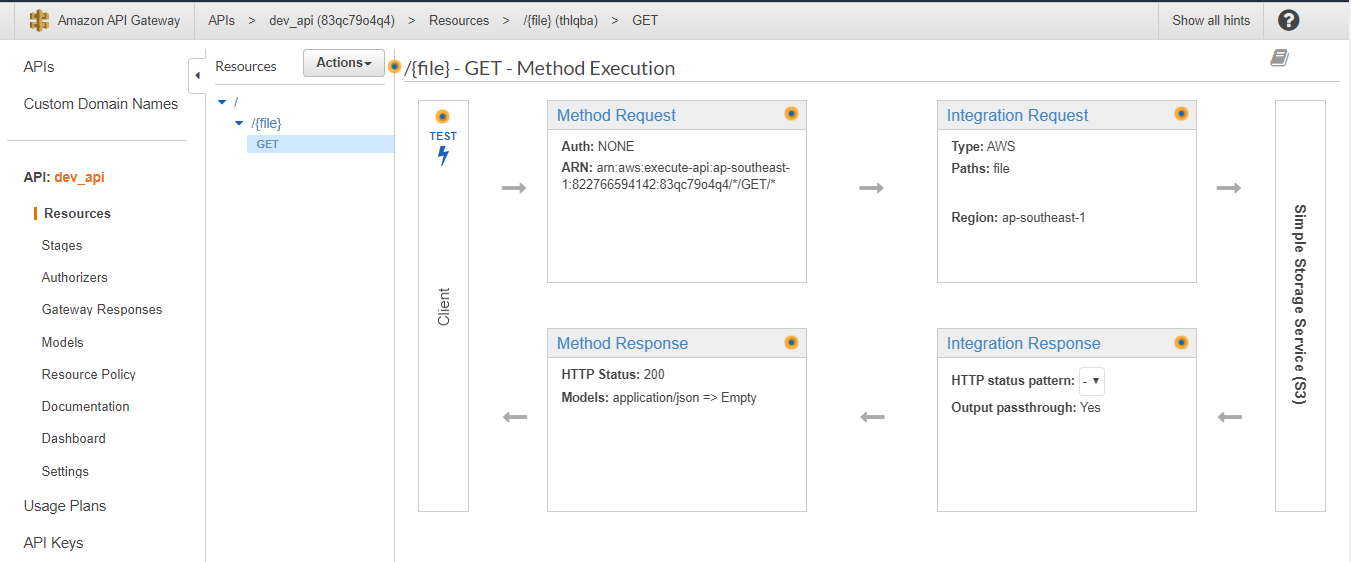

In [61]:
# Steps to create Dynamic Rest-API URL via API-gateway service for the data present in AWS S3 bucket
Image(filename='apigateway_get.png')

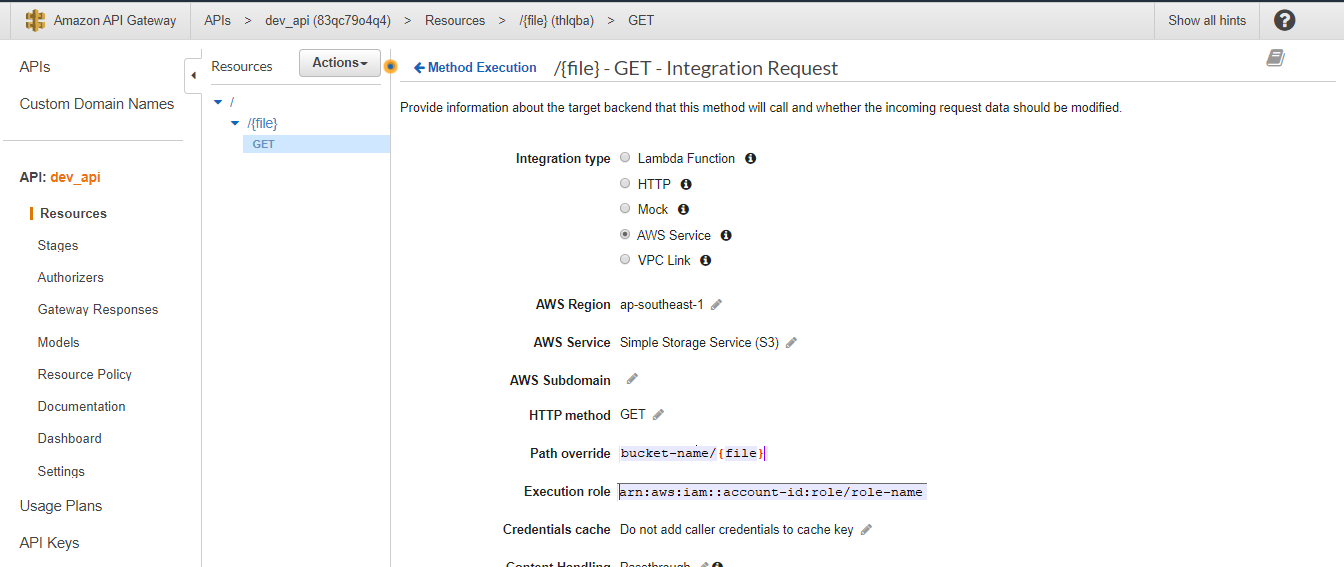

In [62]:
#Integrating AWS-S3 Service with API gateway
Image(filename='apigateway_get_integration.png')

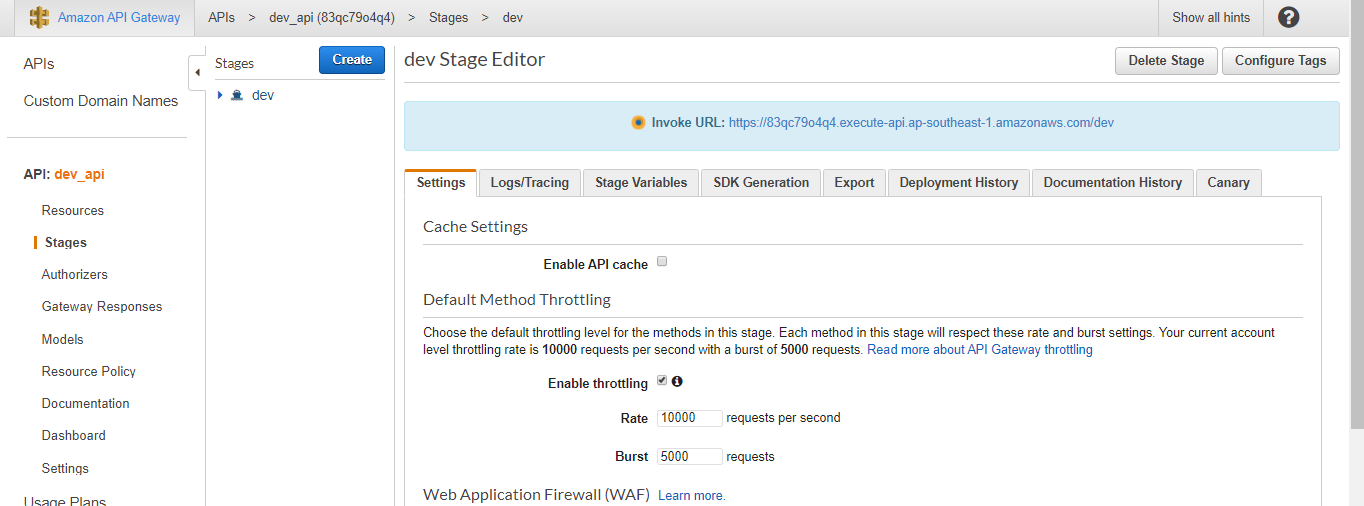

In [63]:
#Deploying the staged api changes to get dynamic url
Image(filename='dev_stage.png')

In [14]:
#function to get apigateway_url_contents
def get_apigateway_url_contents():
    api_get_url='https://83qc79o4q4.execute-api.ap-southeast-1.amazonaws.com/dev/<>.json'
    contents = urllib2.urlopen(api_get_url).read()
    return contents

In [17]:
#function to push the retrieved message from @get_apigateway_url_contents() to created sqs queue @create_sqs_queue() using boto 3
def push_messages_to_sqs_queue():
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    queue = sqs.get_queue_by_name(QueueName=QUEUE_NAME)
    message=get_apigateway_url_contents()
    msg = queue.send_message(MessageBody=message)

    messages = queue.receive_messages()

In [18]:
push_messages_to_sqs_queue()

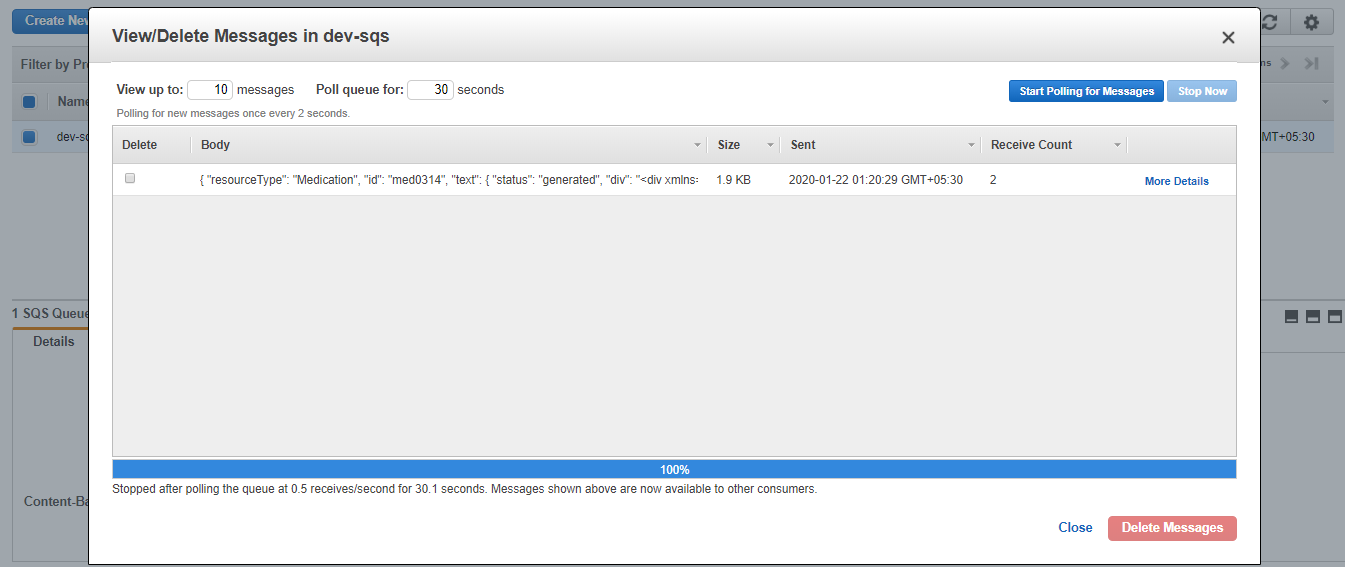

In [19]:
#AWS Console View of pushed message via @push_messages_to_sqs_queue()
Image(filename='sqs_push_pull_msg.png')

In [72]:
#function to get the message from sqs queue using boto 3
def get_messages_from_sqs_queue(queue_url):
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)        
    print(queue_url)
    msgs = sqs_client.receive_message(QueueUrl=queue_url,AttributeNames=['All'], MaxNumberOfMessages=10)
    return msgs['Messages']

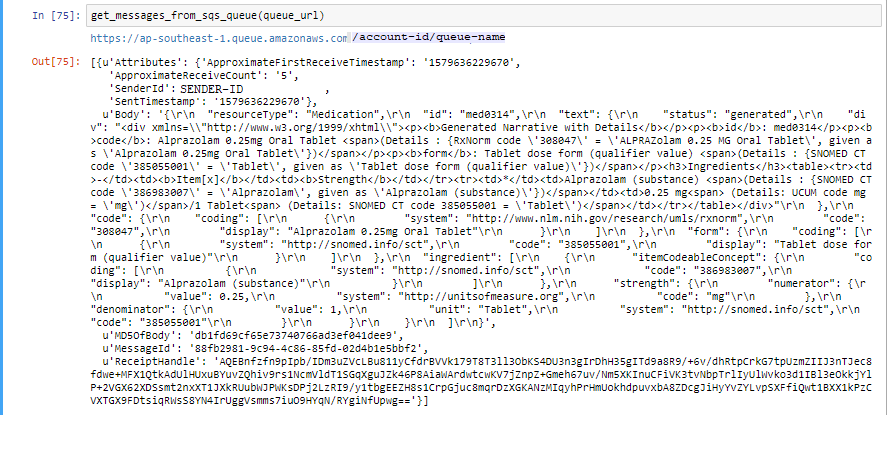

In [76]:
Image(filename='result.png')